# Actividad

- **Nombre**: 
- **Matrícula**: 

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('Se cargó el archivo: "{name}" con una longitud de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving presion.csv to presion.csv
Se cargó el archivo: "presion.csv" con una longitud de 108 bytes


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


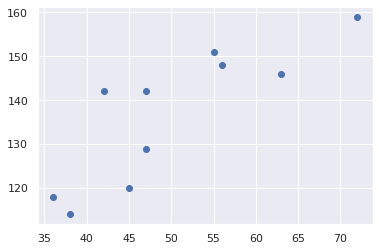

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['presion.csv'].decode('utf-8')))

x = df['edad']
y = df['presion']

plt.scatter(x, y);

3. Genera una regresión lineal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.1483331897665603
Model intercept: 79.36850719269533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


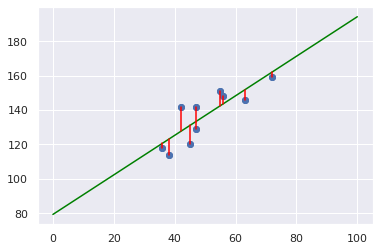

In [5]:
xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="green");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [6]:
edad_calcular=76

def presion(edad):
  return 1.1483331897665603 * edad + 79.36850719269533

presion(edad_calcular)

166.6418296149539

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [7]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('Se cargó el archivo: "{name}" con una longitud de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  

Saving AdvmiNegocio.csv to AdvmiNegocio.csv
Se cargó el archivo: "AdvmiNegocio.csv" con una longitud de 4400 bytes


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


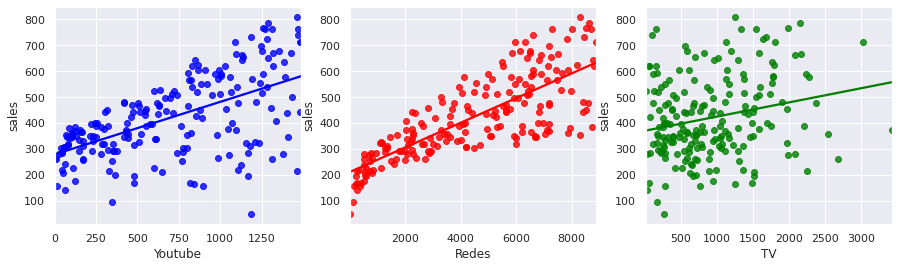

In [12]:
negocio_df = pd.read_csv(io.StringIO(uploaded['AdvmiNegocio.csv'].decode('utf-8')))

fig, axs = plt.subplots(1, 3, figsize=(15,4))

# Televisión
sns.regplot(data=negocio_df, x='Youtube',y='sales', ax=axs[0], ci=None, color='blue')

# Radio
sns.regplot(data=negocio_df, x='Redes',y='sales', ax=axs[1], color='red', ci=None)

# Periódico
sns.regplot(data=negocio_df, x='TV',y='sales', ax=axs[2], color='green', ci=None)

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

* **La Tv está teniendo menos ventas**Se puede observar como al inicio la televisión estaba teniendo aplastantemente mayores ventas, pero con el paso del tiempo, se ha ido disminuyendo drásticamente.*

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [14]:
# Televisión
lm1 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm1.fit(negocio_df[['Redes']], negocio_df['sales'])
print('Redes')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(negocio_df[['Redes']], negocio_df['sales']), '\n')

# Radio
lm2 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm2.fit(negocio_df[['Youtube']], negocio_df['sales'])
print('Youtube')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(negocio_df[['Youtube']], negocio_df['sales']), '\n')


# Periódico
lm3 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm3.fit(negocio_df[['TV']], negocio_df['sales'])
print('TV')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(negocio_df[['TV']], negocio_df['sales']))

Redes
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

Youtube
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536 

TV
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

Evaluados en base a score, por lo que significa que tienen mayores ventas : 
1- Redes. 
2- Youtube
3- TV

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [25]:

lm4 = LinearRegression()

lm4.fit(negocio_df[['Redes', 'Youtube']], negocio_df['sales'])
print('Redes y Youtube')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(negocio_df[['Redes', 'Youtube']], negocio_df['sales']), '\n')


lm5 = LinearRegression()

lm5.fit(negocio_df[['Redes','TV']], negocio_df['sales'])
print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(negocio_df[['Redes','TV']], negocio_df['sales']), '\n')


lm6 = LinearRegression()

lm6.fit(negocio_df[['Youtube','Redes']], negocio_df['sales'])
print('Radio y Periódico')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(negocio_df[['Youtube','TV']], negocio_df['sales']))

def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
lm4 = LinearRegression()
lm4.fit(negocio_df[['Redes', 'Youtube']], negocio_df['sales'])
print('Redes y Youtube')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(negocio_df[['Redes', 'Youtube']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Redes', 'Youtube']],
                                   negocio_df['sales'], lm4), '\n')

lm5 = LinearRegression()
lm5.fit(negocio_df[['Redes','TV']], negocio_df['sales'])
print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(negocio_df[['Redes','TV']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Redes', 'TV']],
                                   negocio_df['sales'], lm5), '\n')

lm6 = LinearRegression()
lm6.fit(negocio_df[['Youtube','TV']], negocio_df['sales'])
print('Youtube y TV')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(negocio_df[['Youtube','TV']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Youtube', 'TV']], 
                                   negocio_df['sales'], lm6), '\n')

lm7 = LinearRegression()
lm7.fit(negocio_df[['Redes','Youtube','TV']], negocio_df['sales'])
print('Redes, Youtube y TV')
print('beta_0: ', lm7.intercept_)
print('betas: ', lm7.coef_)
print('Score: ', lm7.score(negocio_df[['Redes','Youtube','TV']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Redes','Youtube','TV']], 
                                   negocio_df['sales'], lm7))

Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956 

Redes y TV
beta_0:  173.24843903734896
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271 

Radio y Periódico
beta_0:  87.6329973721542
betas:  [0.18799423 0.04575482]
Score:  -0.7401153215624632
Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

Redes y TV
beta_0:  173.24843903734896
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 

Youtube y TV
beta_0:  275.66761377589694
betas:  [0.19904459 0.00664417]
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

Redes, Youtube y TV
beta_0:  88.16668108378224
betas:  [ 0.04576465  0.18853002 -0.00103749]
Score:  0.8972106381789521
Score ajustado: 0.8956373316204667


7.  ¿Cuál modelo es el que nos conviene elegir?

Redes y Youtube es el mejor, ya que fue el que salió con un score más alto y como pudimos observar anteriormente, fueron los dos que más crecimiento han tenido con el paso del tiempo.